# Stages Maps with Cartopy

## Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import datetime
import dateutil.parser as dparser


"ASTROPY"
from astropy.time import Time
from astropy.table import Table
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun
import astropy.units as u

"CARTOPY"
import cartopy.crs as ccrs
from cartopy.feature.nightshade import Nightshade

"MATPLOTLIB"
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pylab import cm

mpl.rcParams['font.family'] = 'Latin Modern Roman'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 2

In [19]:
ephemeris = pd.read_csv("../ephemeris2.csv")

maxlons = np.loadtxt("../Data/maxlons.txt")
maxlats = np.loadtxt("../Data/maxlats.txt")
deltas = np.loadtxt("../Data/deltas.txt")

radio = pd.read_csv("../AllRadiotelescopes.csv").dropna(how='all')

"""
TBD en el CSV
- Añadir dx y dy para poner el label.
- Añadir un código según la fase: 1.1, 1.2, etc.
- 
"""

## Create Trajectory

In [75]:
def draw(ax,t,i,text=False,arrow=False):
    date = dparser.parse(ephemeris['datetime_str'][t])
    labels = list('abcdefghi')
    ax.set_global()
    ax.coastlines()
    # ax.stock_img()
    ax.add_feature(Nightshade(date, alpha=0.2))
    ax.set_title(
        "Stages of 99942 Apophis Trajectory".format(
        labels[i], str(ephemeris['datetime_str'][t]), ephemeris['delta (Rt)'][t]),
        size=15)

    # Contorno blanco
    plt.plot(maxlons,maxlats,'b-',lw=5,transform=data_crs)
    plt.plot(maxlons[t],maxlats[t],'bo',ms=15,transform=data_crs)

    # Relleno azul
    plt.plot(maxlons,maxlats,'w-',lw=2,transform=data_crs)
    plt.plot(maxlons[t],maxlats[t],'wo',ms=12,transform=data_crs)

    if arrow:
        plt.arrow(maxlons[t],maxlats[t]+10,0,-10,'wo',ms=12,transform=data_crs)


    # for rad in radio:
    for r,row in radio.iterrows():
        if row.Power is not np.nan:
            plt.plot(row.Longitude,row.Latitude,'r*',ms=15,transform=data_crs)
        else:
            plt.plot(row.Longitude,row.Latitude,'ro',ms=10,transform=data_crs)
        if text:
            pass
            # k = 1
            # dx,dy = row[['dx','dy']]
            # plt.text(
            #     row.Longitude+k*dx,row.Latitude+k*dy,
            #     row.Name,transform=data_crs,fontsize=15,rotation=30)
        # plt.annotate(str(r),(row.Longitude+5,row.Latitude),size=10)
    if text:
        plt.plot(row.Longitude,row.Latitude,'ro',ms=10,transform=data_crs,label="Recievers")
        plt.plot(row.Longitude,row.Latitude,'r*',ms=10,transform=data_crs,label="Transmitters")
        plt.legend(loc=3)

    di = 0
    rot = [0, -30, 10, 5]
    f = int(len(maxlats)/4.5)
    for i in [1,2,3,4]:
        if i == 3: di += 1
        if i == 2: dy = 20
        else: dy = 10
        plt.text(maxlons[i*f],maxlats[i*f] - dy,
        f"Stage {i+di}",size=20,color='blue',
        transform=data_crs, rotation=rot[i-1])

    plt.text(maxlons[t]-20,maxlats[t] - 10,
    f"Stage 3",size=20,color='blue',
    transform=data_crs, rotation=-20)

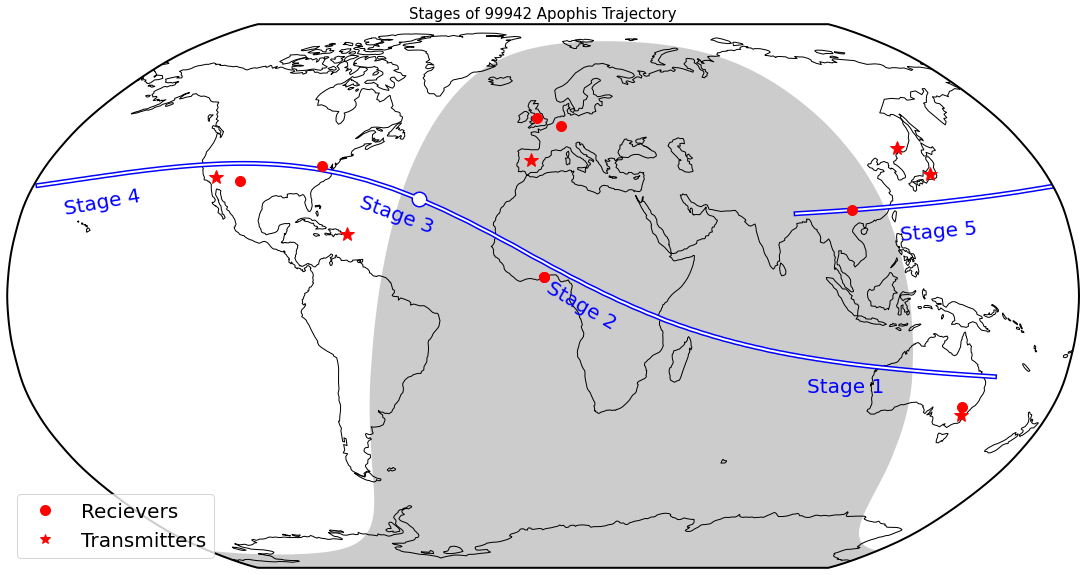

In [76]:
radio = pd.read_csv("../AllRadiotelescopes.csv").dropna(how='all')


data_crs = ccrs.Geodetic()

t = ephemeris['delta'].idxmin()
# t = int(0.93*len(ephemeris))

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
draw(ax,t,0,True)